<a href="https://colab.research.google.com/github/RRM2021/USAID-MODELS/blob/main/TOC_OIR_CHOCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTRATEGIA DE INTEGRACIÓN REGIONAL RIS

MODELO ANALÍTICO LÍNEAS DE ACCIÓN Y OIR CHOCÓ

RICARDO RAMÍREZ -CONSULTOR

DESCARGA DEL SET DE DATOS

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# Replace 'your-link' with the actual URL of your Google Sheets document
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1fPIEOlmQPs0EsHEwLaWRZ21HG1sDrqrb1mapV1NInnE/edit?usp=sharing')

# Specify the sheet name (e.g., 'data available')
sheets = gsheets.worksheet('DATOS_MODELO').get_all_values()

# Create a Pandas DataFrame from the retrieved data
import pandas as pd
df = pd.DataFrame(sheets[1:], columns=sheets[0])
df

,ACTIVIDADES_USAID,OFICINAS_USAID,QUIBDO,ISTMINA,CONDOTO,MEDIO_ATRATO,MEDIO_SAN_JUAN,BOJAYA,RIO_SUCIO,NOVITA,...,IR_1_1,IR_1_2,IR_1_2_1,IR_2_1,IR_2_2,IR_2_3_1,IR_3_1,IR_3_2,IR_4_1,IR_4_2
0,Suma Social,PRO,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,Restaurando Nuestro Futuro,PGO,1,1,1,1,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2,Juntanza Étnica,PGO,1,0,0,0,0,1,1,0,...,0,0,0,1,1,1,1,1,0,0
3,Justicia Inclusiva,PGO,1,1,1,0,1,1,0,1,...,1,0,1,1,1,0,0,0,0,0
4,Jóvenes Resilientes,PGO,1,1,0,0,0,1,0,0,...,1,1,0,1,0,0,1,0,0,0
5,Tierra Dorada,SEED,1,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
6,InspiraPaz,PGO,1,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
7,Hilando Vidas y Esperanzas,PGP,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


IDENTIFICACIÓN DE TIPO DE DATOS DE LAS VARIABLES

In [ ]:
# Iterate over columns starting from index 1
for col in df.columns[1:]:
    # Use try-except block to handle conversion errors
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        # Print a message if conversion fails for a specific column
        print(f"Error converting column '{col}' to float")

# Print the DataFrame with updated data types
print(df.dtypes)



Error converting column 'OFICINAS_USAID' to float
ACTIVIDADES_USAID       object
OFICINAS_USAID          object
QUIBDO                 float64
ISTMINA                float64
CONDOTO                float64
MEDIO_ATRATO           float64
MEDIO_SAN_JUAN         float64
BOJAYA                 float64
RIO_SUCIO              float64
NOVITA                 float64
ATRATO                 float64
CERTEGUI               float64
CANTON_DE_SAN_PABLO    float64
LLORO                  float64
RIO_QUITO              float64
TADO                   float64
UNION_PANAMERICANA     float64
M1                     float64
M2                     float64
M3                     float64
M4                     float64
M5                     float64
IR_1_1                 float64
IR_1_2                 float64
IR_1_2_1               float64
IR_2_1                 float64
IR_2_2                 float64
IR_2_3_1               float64
IR_3_1                 float64
IR_3_2                 float64
IR_4_1              

REVISIÓN DE ESTADÍSTICAS BÁSICAS DE CADA VARIABLE

In [ ]:
df.describe()

,QUIBDO,ISTMINA,CONDOTO,MEDIO_ATRATO,MEDIO_SAN_JUAN,BOJAYA,RIO_SUCIO,NOVITA,ATRATO,CERTEGUI,...,IR_1_1,IR_1_2,IR_1_2_1,IR_2_1,IR_2_2,IR_2_3_1,IR_3_1,IR_3_2,IR_4_1,IR_4_2
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000,...,8.000000,8.000000,8.00000,8.00000,8.000000,8.00000,8.000000,8.00000,8.0,8.0
mean,0.875000,0.625000,0.375000,0.125000,0.25000,0.375000,0.125000,0.25000,0.125000,0.125000,...,0.625000,0.500000,0.25000,0.75000,0.375000,0.25000,0.500000,0.25000,0.0,0.0
std,0.353553,0.517549,0.517549,0.353553,0.46291,0.517549,0.353553,0.46291,0.353553,0.353553,...,0.517549,0.534522,0.46291,0.46291,0.517549,0.46291,0.534522,0.46291,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.75000,0.000000,0.00000,0.000000,0.00000,0.0,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.500000,0.00000,1.00000,0.000000,0.00000,0.500000,0.00000,0.0,0.0
75%,1.000000,1.000000,1.000000,0.000000,0.25000,1.000000,0.000000,0.25000,0.000000,0.000000,...,1.000000,1.000000,0.25000,1.00000,1.000000,0.25000,1.000000,0.25000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.00000,0.0,0.0


CREACIÓN DE UN DATA FRAME CON LOS DATOS NUMÉRICOS

In [ ]:
# Create a new DataFrame with columns from index 1 to the end
df2 = df.iloc[:, 2:]
df2.head(5)

,QUIBDO,ISTMINA,CONDOTO,MEDIO_ATRATO,MEDIO_SAN_JUAN,BOJAYA,RIO_SUCIO,NOVITA,ATRATO,CERTEGUI,...,IR_1_1,IR_1_2,IR_1_2_1,IR_2_1,IR_2_2,IR_2_3_1,IR_3_1,IR_3_2,IR_4_1,IR_4_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


CREACIÓN DE UNA ARRAY CON LOS DATOS

In [ ]:
X = df2.values
X

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0

ESTANDARIZACIÓN DE LOS DATOS PARA EL ÓPTIMO FUNCIONAMIENTO DEL MODELO ANALÍTICO

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.37796447, -1.29099445, -0.77459667, -0.37796447, -0.57735027,
        -0.77459667, -0.37796447, -0.57735027, -0.37796447, -0.37796447,
        -0.37796447, -0.37796447, -0.37796447, -0.37796447, -0.37796447,
        -0.37796447, -1.        , -0.57735027, -1.73205081, -0.77459667,
        -1.29099445,  1.        , -0.57735027, -1.73205081,  1.29099445,
        -0.57735027, -1.        , -0.57735027,  0.        ,  0.        ],
       [ 0.37796447,  0.77459667,  1.29099445,  2.64575131,  1.73205081,
        -0.77459667, -0.37796447, -0.57735027, -0.37796447, -0.37796447,
        -0.37796447, -0.37796447, -0.37796447, -0.37796447, -0.37796447,
        -0.37796447, -1.        , -0.57735027,  0.57735027, -0.77459667,
         0.77459667,  1.        , -0.57735027,  0.57735027, -0.77459667,
        -0.57735027, -1.        , -0.57735027,  0.        ,  0.        ],
       [ 0.37796447, -1.29099445, -0.77459667, -0.37796447, -0.57735027,
         1.29099445,  2.64575131, -0.57735027, -0

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

REDUCCIÓN DE LA DIMENSIONALIDAD DE LOS DATOS, DE 30 A 3 VARIABLES

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Load data (digits dataset)
data = Clus_dataSet
pca = PCA(3)
df_dim_red = pca.fit_transform(data)

In [ ]:
df_dim_red

array([[ 2.94638314, -0.92939298, -1.99472385],
       [ 8.94469828, -2.32030589,  0.87566346],
       [-0.96679483,  2.40580231, -2.07161239],
       [ 2.18258748,  4.4058948 ,  0.15023174],
       [-0.94917451, -2.47570407, -0.06960014],
       [-1.21442446,  3.24741822, -1.51854088],
       [ 0.3994306 ,  2.92551815,  5.03937846],
       [-3.08976142, -2.61658374,  2.03897909],
       [-2.17745396,  0.62998138, -1.17371883],
       [-2.82961374, -0.41246789, -0.68541994],
       [-3.29886724, -2.6866688 ,  1.90135621],
       [ 0.05299067, -2.17349149, -2.49199293]])

IMPORTACIÓN DE LIBRERÍAS PARA EL MODELO ANALÍTICO

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
from sklearn.model_selection import GridSearchCV

IDENTIFICACIÓN DE LOS PARÁMETROS ÓPTIMOS DEL MODELO DE CLUSTERIZACIÓN, CON EL ALGORITMO K-Means

In [ ]:
k_means = KMeans()
# Set up the parameter grid to search over
param_grid = {"n_clusters": [2, 3], "n_init": [4, 5], "max_iter": [5, 10, 15, 25], "algorithm": ["auto", "full", "elkan"]}

# Set up the grid search
grid_search = GridSearchCV(k_means, param_grid=param_grid, cv=5)

# Run the grid search
grid_search.fit(df_dim_red)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'max_iter': 15, 'n_clusters': 3, 'n_init': 5}
Best score: -39.535698973044184


ENTRENAMIENTO DEL MODELO ANALÍTICO CON LOS DATOS Y ASIGNACIÓN DE LAS ETIQUETAS A CADA PUNTO DEL SET DE DATOS

In [ ]:
from sklearn.cluster import KMeans

# Define the best parameters obtained from the grid search
best_params = grid_search.best_params_
#best_params = {'algorithm': 'full', 'max_iter': 5, 'n_clusters': 3, 'n_init': 5}
# Create a K-Means model with the best parameters
k_means = KMeans(**best_params)

# Fit the model to your data
k_means.fit(df_dim_red)

# Get the cluster labels for each data point
labels = k_means.labels_
print(labels)

[0 0 2 0 0 1 0 0]


VISUALIZACIÓN DE LOS PUNTOS Y CLUSTERS

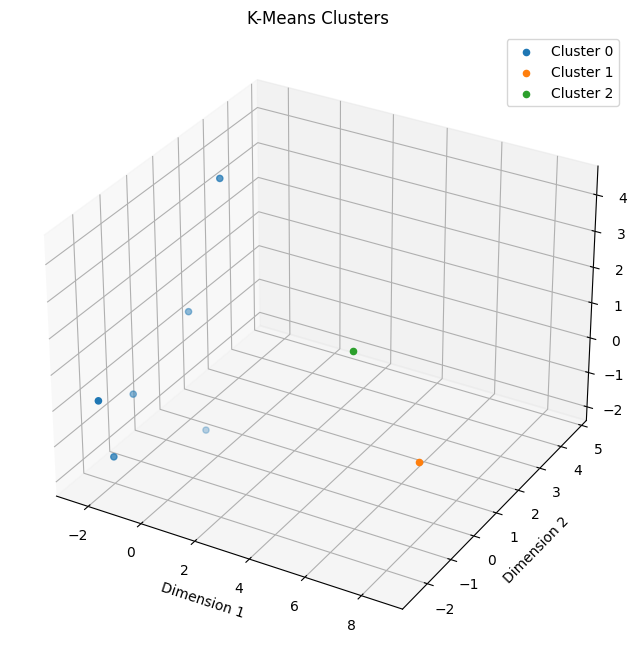

In [ ]:
# Plot individual clusters

fig = plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
ax = fig.add_subplot(111, projection='3d')

for k in range(len(k_means.cluster_centers_)):
    filtered_data = df_dim_red[labels == k]
    ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], label=f'Cluster {k}')

ax.set_title('K-Means Clusters')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.legend()

plt.show()


In [ ]:
try:
    import dash
    import dash_core_components as dcc
    import dash_html_components as html
    import plotly
    print("dash is already installed.")
except ImportError:
    !pip install dash dash-core-components dash-html-components plotly
    print("dash is not installed. Installing now...")
    !pip install dash dash-core-components dash-html-components plotly
    print("Dash installation complete.")


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
# Create a Dash application
app = dash.Dash(__name__)

# Create the 3D scatter plot using Plotly

fig = go.Figure()

for k in range(len(k_means.cluster_centers_)):
    filtered_data = df_dim_red[labels == k]
    fig.add_trace(go.Scatter3d(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        z=filtered_data[:, 2],
        mode='markers',
        name=f'Cluster {k}'
    ))

fig.update_layout(
    title='K-Means Clusters',
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    legend=dict(
        x=0,
        y=1,
        traceorder='normal'
    )
)

# Define the layout of the Dash application
app.layout = html.Div(children=[
    html.H1(children='K-Means Clusters'),
    dcc.Graph(
        id='3d-scatter-plot',
        figure=fig,
        style={'width': '100%', 'height': '100vh'}  # Adjust the width and height
    )
])

# Run the Dash application
if __name__ == '__main__':
    app.run_server(debug=True)


IDENTIFICACIÓN DE LAS ETIQUETAS DE CADA CLUSTER ASIGNADAS A CADA ACTIVIDAD DE USAID

In [ ]:
# Add the labels to the dataframe
df['Clus_km'] = labels
df_labels = df.iloc[:, [0, -1]]
df_labels

,ACTIVIDADES_USAID,Clus_km
0,Suma Social,0
1,Restaurando Nuestro Futuro,0
2,Juntanza Étnica,2
3,Justicia Inclusiva,0
4,Jóvenes Resilientes,0
5,Tierra Dorada,1
6,InspiraPaz,0
7,Hilando Vidas y Esperanzas,0


CARACTERIZACIÓN DE CADA CLUSTER, CON BASE EN EL PROMEDIO DEL VALOR DE CADA VARIABLE

In [ ]:
pd.set_option('display.max_columns', None)

df_caract = df.iloc[:, 2:]
df_caract.groupby('Clus_km').mean()
df3 = df_caract.groupby('Clus_km').mean()
df3

,QUIBDO,ISTMINA,CONDOTO,MEDIO_ATRATO,MEDIO_SAN_JUAN,BOJAYA,RIO_SUCIO,NOVITA,ATRATO,CERTEGUI,CANTON_DE_SAN_PABLO,LLORO,RIO_QUITO,TADO,UNION_PANAMERICANA,M1,M2,M3,M4,M5,IR_1_1,IR_1_2,IR_1_2_1,IR_2_1,IR_2_2,IR_2_3_1,IR_3_1,IR_3_2,IR_4_1,IR_4_2
Clus_km,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.833333,0.666667,0.333333,0.166667,0.333333,0.333333,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.333333,0.0,0.833333,0.5,0.833333,0.666667,0.333333,0.833333,0.333333,0.0,0.333333,0.0,0.0,0.0
1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0,0.0,0.0
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.0,0.0,0.0
